In [122]:
import pandas as pd
import numpy as np

july_cleaned = pd.read_csv("july_cleaned.csv")

In [123]:
july_cleaned

,Unnamed: 0,Unnamed: 0.1,GEOID,MedianIncome,Pickup,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity,Distance_from_transit
0,0,0,17031010201,41125,1837.0,7039,59.119022,1.490412,0.019724,0.069242,234.2500
1,1,1,17031010202,45236,1375.0,2852,36.278590,8.568341,0.027317,0.724295,193.7950
2,2,2,17031010300,72917,1627.0,6650,58.470922,9.582295,0.106673,0.346823,184.4025
3,3,3,17031010400,58438,1204.0,5153,64.711477,29.071885,0.023679,2.464812,152.4400
4,4,4,17031010501,52747,1310.0,4147,84.888695,3.081571,0.032108,0.066411,113.1000
...,...,...,...,...,...,...,...,...,...,...,...
890,890,918,17031843500,28750,150.0,10317,23.140485,6.286981,0.085057,9.501695,537.7900
891,891,919,17031843600,67609,915.0,2918,28.806947,3.053905,0.114072,0.230467,264.8700
892,892,920,17031843700,194375,1843.0,2617,14.264697,16.557479,0.100851,4.656542,283.6450
893,893,921,17031843800,41250,58.0,1482,4.633875,0.716691,0.092342,0.372437,274.9300


In [124]:
july_cleaned = july_cleaned.drop(july_cleaned.columns[[0,1]],axis=1)

In [125]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X = july_cleaned[july_cleaned.columns[2:10]]
sc_X = sc.fit_transform(X)
sc_X = pd.DataFrame(sc_X)

In [126]:
sc_X

,0,1,2,3,4,5,6
0,0.096051,1.827695,1.026911,-0.200247,-1.201264,-0.192527,-0.398055
1,-0.018467,-0.454493,0.188995,-0.057699,-1.152769,-0.106141,-0.756054
2,0.043997,1.615664,1.003135,-0.037278,-0.645925,-0.155921,-0.839172
3,-0.060853,0.799702,1.232074,0.355237,-1.176004,0.123393,-1.122018
4,-0.034578,0.251366,1.972289,-0.168201,-1.122168,-0.192901,-1.470151
...,...,...,...,...,...,...,...
890,-0.322111,3.614418,-0.292985,-0.103645,-0.783983,1.051397,2.288071
891,-0.132488,-0.418519,-0.085107,-0.168759,-0.598668,-0.171265,-0.127088
892,0.097538,-0.582583,-0.618600,0.103200,-0.683110,0.412433,0.039058
893,-0.344915,-1.201232,-0.971913,-0.215830,-0.737453,-0.152543,-0.038064


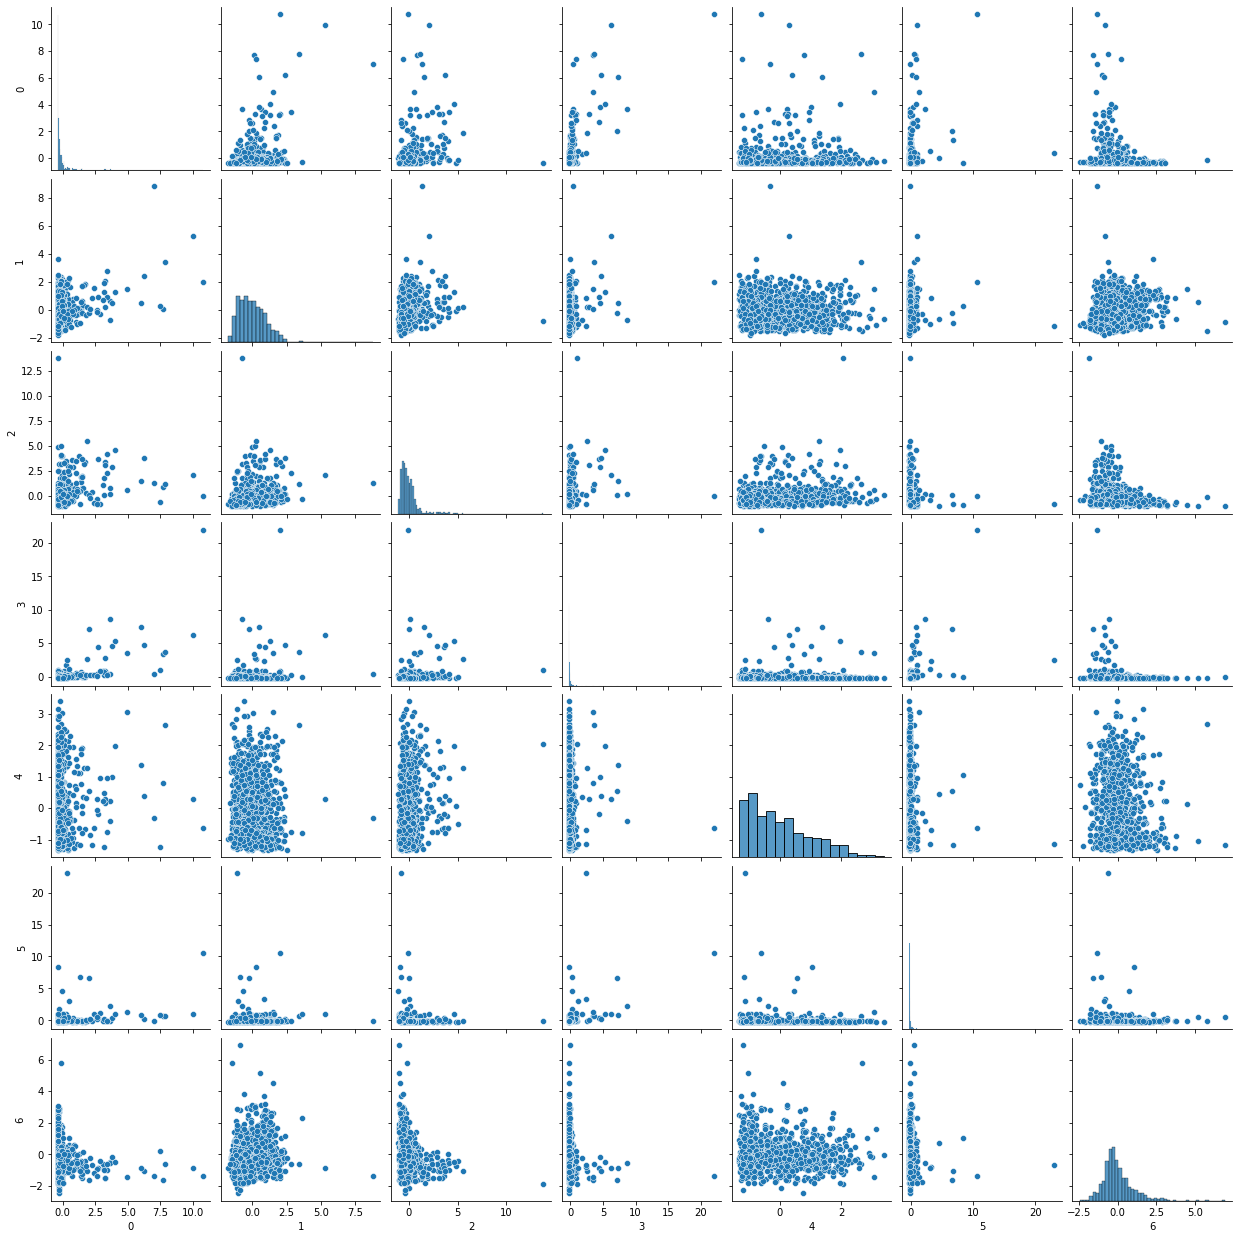

In [127]:
import seaborn as sns

sns.pairplot(sc_X)

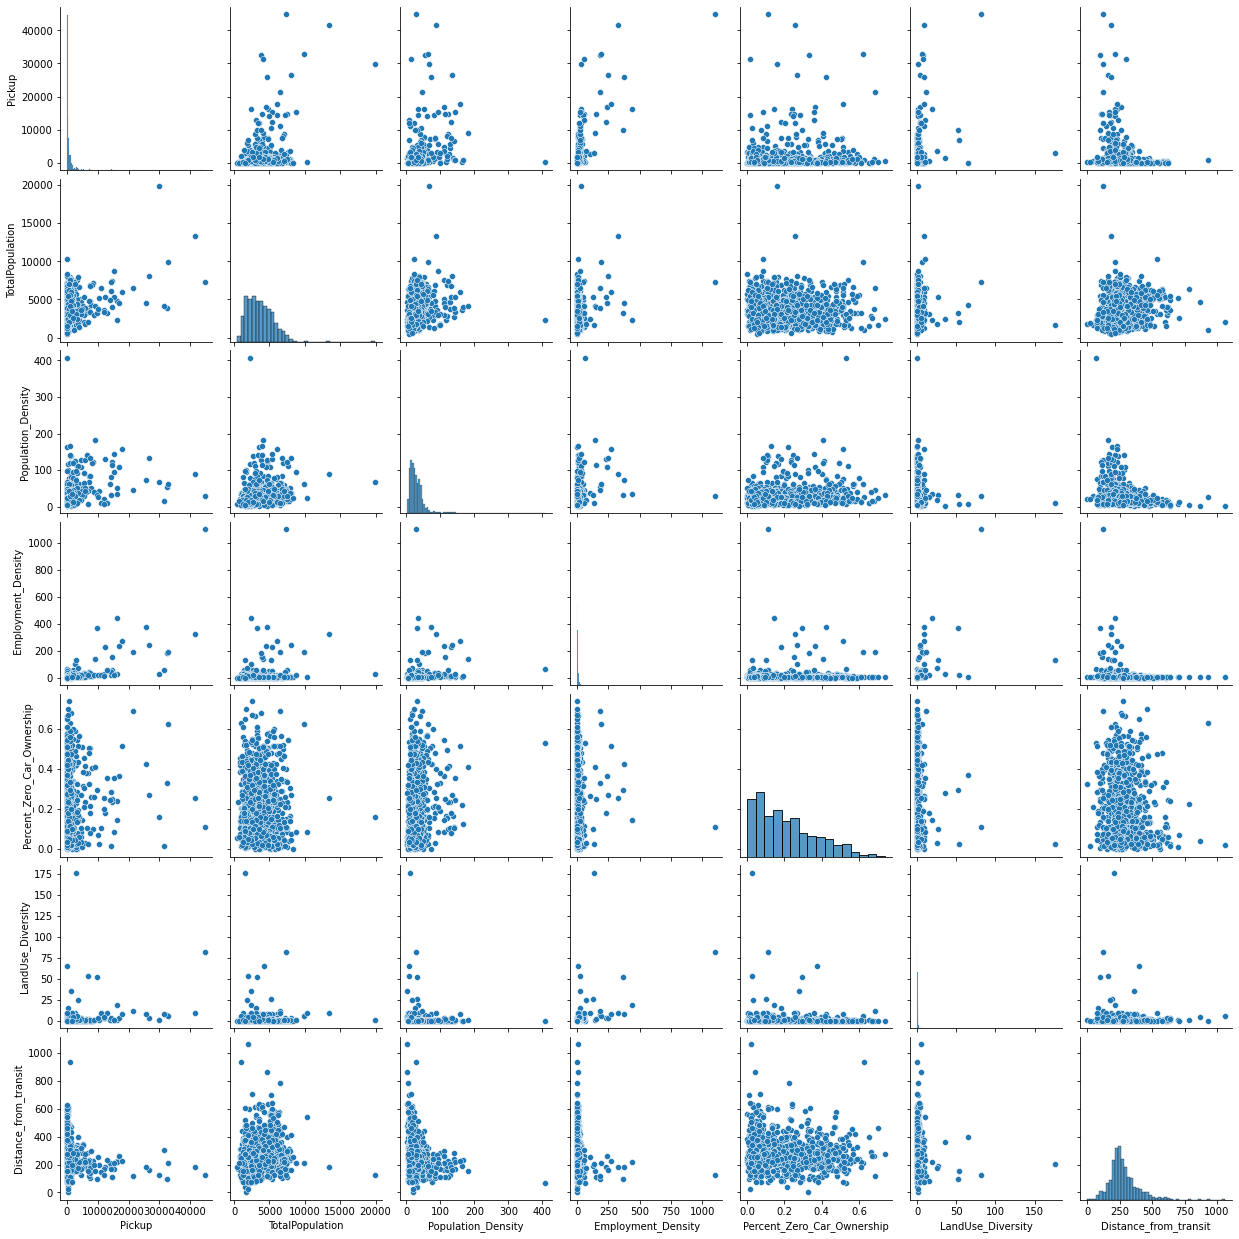

In [128]:
sns.pairplot(X)

In [129]:
X.describe()

,Pickup,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity,Distance_from_transit
count,834.000000,895.000000,895.000000,895.000000,895.000000,895.000000,895.000000
mean,1449.500000,3685.832402,31.126855,11.433281,0.207805,1.529142,279.231323
std,4036.743782,1835.669104,27.273841,49.680776,0.156657,7.587057,113.066076
min,1.000000,416.000000,2.139127,0.027023,0.000000,0.004566,0.000000
25%,92.500000,2279.000000,15.511413,1.574978,0.076061,0.185373,212.232500
50%,317.500000,3489.000000,25.353804,3.343507,0.169782,0.402181,257.492500
75%,1058.750000,4865.500000,38.504164,7.629479,0.304552,0.949799,327.902500
max,44804.000000,19889.000000,407.584189,1102.545869,0.740122,176.285714,1062.170000


In [130]:
X.corr()

,Pickup,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity,Distance_from_transit
Pickup,1.000000,0.326684,0.321217,0.715943,0.078906,0.252639,-0.216382
TotalPopulation,0.326684,1.000000,0.150188,0.128796,-0.094133,0.000234,0.116202
Population_Density,0.321217,0.150188,1.000000,0.203943,0.160754,-0.062936,-0.321383
Employment_Density,0.715943,0.128796,0.203943,1.000000,0.039459,0.470107,-0.143923
Percent_Zero_Car_Ownership,0.078906,-0.094133,0.160754,0.039459,1.000000,-0.058105,-0.091225
LandUse_Diversity,0.252639,0.000234,-0.062936,0.470107,-0.058105,1.000000,-0.048370
Distance_from_transit,-0.216382,0.116202,-0.321383,-0.143923,-0.091225,-0.048370,1.000000


<AxesSubplot:>

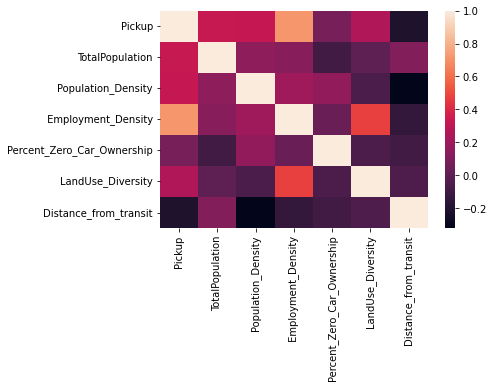

In [131]:
sns.heatmap(X.corr())

<AxesSubplot:>

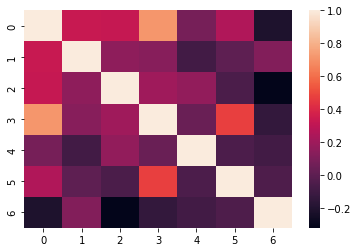

In [160]:
sns.heatmap(sc_X.corr())

In [132]:
import geopandas as gpd

tracts = gpd.read_file("shapes.geojson")

In [133]:
tracts = tracts[["GEOID", "geometry"]]

In [134]:
tracts["GEOID"] = tracts["GEOID"].astype("int")

In [135]:
tracts = tracts[tracts["GEOID"].isin(july_cleaned["GEOID"])]

In [136]:
tracts["centroid"] = tracts["geometry"].centroid

/var/folders/zc/cc95gj757jqdfmtj7lsf19j00000gn/T/ipykernel_19739/515565930.py:1: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  tracts["centroid"] = tracts["geometry"].centroid


In [137]:
tracts.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 895 entries, 0 to 3116
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   GEOID     895 non-null    int64   
 1   geometry  895 non-null    geometry
 2   centroid  895 non-null    geometry
dtypes: geometry(2), int64(1)
memory usage: 28.0 KB


In [138]:
july_cleaned

,GEOID,MedianIncome,Pickup,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity,Distance_from_transit
0,17031010201,41125,1837.0,7039,59.119022,1.490412,0.019724,0.069242,234.2500
1,17031010202,45236,1375.0,2852,36.278590,8.568341,0.027317,0.724295,193.7950
2,17031010300,72917,1627.0,6650,58.470922,9.582295,0.106673,0.346823,184.4025
3,17031010400,58438,1204.0,5153,64.711477,29.071885,0.023679,2.464812,152.4400
4,17031010501,52747,1310.0,4147,84.888695,3.081571,0.032108,0.066411,113.1000
...,...,...,...,...,...,...,...,...,...
890,17031843500,28750,150.0,10317,23.140485,6.286981,0.085057,9.501695,537.7900
891,17031843600,67609,915.0,2918,28.806947,3.053905,0.114072,0.230467,264.8700
892,17031843700,194375,1843.0,2617,14.264697,16.557479,0.100851,4.656542,283.6450
893,17031843800,41250,58.0,1482,4.633875,0.716691,0.092342,0.372437,274.9300


In [139]:
X = july_cleaned[july_cleaned.columns[1:8]]

In [140]:
X

,MedianIncome,Pickup,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity
0,41125,1837.0,7039,59.119022,1.490412,0.019724,0.069242
1,45236,1375.0,2852,36.278590,8.568341,0.027317,0.724295
2,72917,1627.0,6650,58.470922,9.582295,0.106673,0.346823
3,58438,1204.0,5153,64.711477,29.071885,0.023679,2.464812
4,52747,1310.0,4147,84.888695,3.081571,0.032108,0.066411
...,...,...,...,...,...,...,...
890,28750,150.0,10317,23.140485,6.286981,0.085057,9.501695
891,67609,915.0,2918,28.806947,3.053905,0.114072,0.230467
892,194375,1843.0,2617,14.264697,16.557479,0.100851,4.656542
893,41250,58.0,1482,4.633875,0.716691,0.092342,0.372437


In [141]:
X = X.dropna()

In [142]:
X.shape

(834, 7)

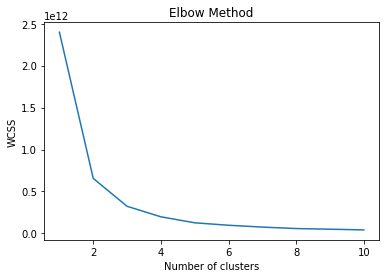

In [143]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [144]:
kmeans = KMeans(n_clusters=3, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)




In [145]:
kmeans.cluster_centers_

array([[1.08642484e+05, 1.58289894e+03, 3.91097340e+03, 3.45700678e+01,
        1.17666905e+01, 2.11525906e-01, 1.70483881e+00],
       [4.95151036e+04, 5.08467043e+02, 3.52475895e+03, 2.89380314e+01,
        3.89995041e+00, 2.17291652e-01, 8.22132250e-01],
       [1.91524096e+05, 5.57653913e+03, 3.57356522e+03, 4.50214008e+01,
        4.87079738e+01, 2.26156413e-01, 4.36597009e+00]])

In [146]:
cluster_centers = pd.DataFrame(kmeans.cluster_centers_)

In [147]:
cluster_centers.columns = X.columns.values

In [148]:
cluster_centers

,MedianIncome,Pickup,TotalPopulation,Population_Density,Employment_Density,Percent_Zero_Car_Ownership,LandUse_Diversity
0,108642.484043,1582.898936,3910.973404,34.570068,11.766690,0.211526,1.704839
1,49515.103578,508.467043,3524.758945,28.938031,3.899950,0.217292,0.822132
2,191524.095652,5576.539130,3573.565217,45.021401,48.707974,0.226156,4.365970


Text(0, 0.5, 'Pickups')

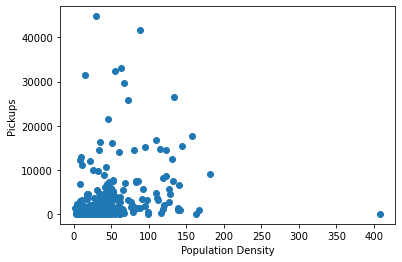

In [152]:
plt.scatter(X["Population_Density"],X["Pickup"])
plt.xlabel("Population Density")
plt.ylabel("Pickups")

Text(0, 0.5, 'Pickups')

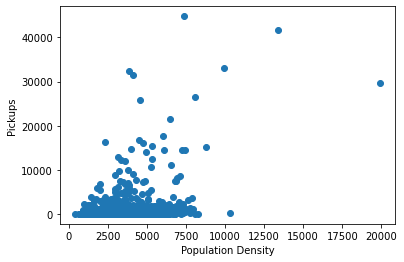

In [153]:
plt.scatter(X["TotalPopulation"],X["Pickup"])
plt.xlabel("Total Population")
plt.ylabel("Pickups")

In [154]:
tracts

,GEOID,geometry,centroid
0,17031843800,"POLYGON ((-87.64554 41.80886, -87.64068 41.808...",POINT (-87.64048 41.80166)
2,17031243000,"POLYGON ((-87.68195 41.89583, -87.67950 41.895...",POINT (-87.67940 41.89228)
3,17031250600,"POLYGON ((-87.77560 41.90925, -87.77536 41.909...",POINT (-87.77063 41.90569)
4,17031251700,"POLYGON ((-87.74826 41.89498, -87.74645 41.895...",POINT (-87.74451 41.89138)
6,17031260500,"POLYGON ((-87.74037 41.88056, -87.73548 41.880...",POINT (-87.73780 41.87664)
...,...,...,...
3098,17031711500,"POLYGON ((-87.64361 41.73607, -87.63875 41.736...",POINT (-87.63870 41.73244)
3107,17031750300,"POLYGON ((-87.69120 41.69899, -87.68807 41.699...",POINT (-87.68617 41.69539)
3108,17031010701,"POLYGON ((-87.68268 42.01250, -87.68027 42.012...",POINT (-87.67861 42.00915)
3110,17031020902,"POLYGON ((-87.68353 41.99183, -87.68170 41.991...",POINT (-87.67871 41.99424)
